In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spqd
%matplotlib inline

## Functions and Derivatives

In [25]:
f0 = lambda x: np.sin(np.cos(x))
f1 = lambda x: -np.sin(x)*np.cos(np.cos(x))
f2 = lambda x: -(np.sin(x))**2. * f0(x) - np.cos(x) * np.cos(np.cos(x)) 
f3 = lambda x: np.sin(x) * ( ((np.sin(x))**2. + 1)*np.cos(np.cos(x)) - 3.*np.cos(x)*np.sin(np.cos(x)) )
f4 = lambda x: -3.*(np.cos(x))**2.*np.sin(np.cos(x)) + (6.*(np.sin(x))**2. + 1.)*np.cos(np.cos(x))*np.cos(x) + (np.sin(x))**2. *(np.sin(x)**2.+4)*np.sin(np.cos(x))

## Taylor Series Expansions

In [27]:
T2 = lambda x, x0: f0(x0) + f1(x0)*(x-x0) + f2(x0)*(x-x0)**2./2.
T3 = lambda x, x0: T2(x, x0) + f3(x0)*(x-x0)**3./6.
T4 = lambda x, x0: T3(x, x0) + f4(x0)*(x-x0)**4./24. 

## Integrals of Taylor Expansions

In [28]:
IT2 = lambda x0, a, b: f0(x0)*(b-a) + f1(x0)/2.*( (b-x0)**2. - (a-x0)**2. ) + f2(x0)/6.*( (b-x0)**3. - (a-x0)**3. )
IT3 = lambda x0, a, b: IT2(x0, a, b) + f3(x0)/24.*( (b-x0)**4. - (a-x0)**4. )
IT4 = lambda x0, a, b: IT3(x0, a, b) + f4(x0)/120.*( (b-x0)**5. - (a-x0)**5. )

**Problem 1**: For the integral 

$$
I = \int_{0}^{\pi/2}\sin(\cos(x)) dx
$$

<ol>
    <li> (1pt) Using `spqd' as in the notes, find a very accurate approximation to $I$.
    <li> (3pts) Using the second order Taylor series approximation $T_{2}(x;0)$, find an approximation to $I$.
    <li> (3pts) Using the fourth order Taylor series approximation $T_{4}(x;0)$, find an approximation to $I$.
    <li> (3pts) Separating the interval of integration in half, use $T_{2}(x;0)$ and $T_{2}(x;\pi/4)$ to approximate $I$.
</ol>

Show all relevant computations and results as well as the code you use to compute everything.  Finally, comment on and compare your results (4pts).  Which was the most accurate Taylor series approximation and why?  Support your argument with plots of the various approximations (4pts) (see the notes for help).  

_Answer to Problem 1.1_: So for the 'true' answer, we have:

In [29]:
Ival = spqd.quad(f0, 0., np.pi/2.)
print("The integral is given by I=%1.15f" %Ival[0])

The integral is given by I=0.893243740975026


_Answer to Problem 1.2_: Using our code from above, we see that 

In [35]:
Ivaprx1 = IT2(0., 0., np.pi/2.)
print("The second order approximation starting at 0 is I_a=%1.15f" %Ivaprx1)
print("The absolute error in this approximation is E=%1.2e" %np.abs(Ival[0]-Ivaprx1))

The second order approximation starting at 0 is I_a=0.972763640650071
The absolute error in this approximation is E=7.95e-02


It's straightforward to show that 

$$
T_{2}(x;0) = \sin(1) - \frac{1}{2}\cos(1)x^{2}
$$

so that 

$$
I \approx \int_{0}^{\pi/2}T_{2}(x;0)dx = \sin(1)\frac{\pi}{2} - \frac{1}{6}\cos(1)\left(\frac{\pi}{2}\right)^{3}
$$

Using this, we see that this gives us the result:

In [32]:
print(np.sin(1.)*np.pi/2. - np.cos(1.)/6.*(np.pi/2.)**3.)

0.9727636406500714


So now we have some real confidence that we're doing the right thing with our lambda functions from above.  Also the approximation is pretty mediocre, being only within about 10%.

_Answer to Problem 1.3_: Using our lambda functions from above, we get that

In [38]:
Ivaprx2 = IT4(0., 0., np.pi/2.)
print("The fourth order approximation starting at 0 is I_a=%1.15f" %Ivaprx2)
print("The absolute error in this approximation is E=%1.2e" %np.abs(Ival[0]-Ivaprx2))

The fourth order approximation starting at 0 is I_a=0.814644652303694
The absolute error in this approximation is E=7.86e-02


So taking a higher order approximation to our function did not produce a better result.  

_Answer to Problem 1.4_

In [53]:
Ivaprx3 = IT2(0., 0., np.pi/4.)
Ivaprx4 = IT2(np.pi/4., np.pi/4., np.pi/2.)
Ivaprxtot = Ivaprx3 + Ivaprx4
print("The split interval approximation is I_a=%1.15f" %Ivaprxtot)
print("The absolute error in this approximation is E=%1.2e" %np.abs(Ival[0]-Ivaprxtot))

The split interval approximation is I_a=0.892050739089772
The absolute error in this approximation is E=1.19e-03


So we see that splitting the interval in half and then using second order approximations lowers the error by over a factor of ten.  So that's nice.

Again, checking ourselves, we find that 

$$
T_{2}(x;\pi/4) = \sin\left(\frac{1}{\sqrt{2}}\right) -\frac{1}{\sqrt{2}}\cos\left(\frac{1}{\sqrt{2}}\right)\left(x-\frac{\pi}{4}\right) - \frac{1}{2}\left(\frac{1}{2}\sin\left(\frac{1}{\sqrt{2}}\right) + \frac{1}{\sqrt{2}}\cos\left(\frac{1}{\sqrt{2}}\right) \right)\left(x-\frac{\pi}{4}\right)^{2}.
$$

Checking our work then, we find:

In [71]:
ssq = np.sin(1./np.sqrt(2.))
csq = np.cos(1./np.sqrt(2.))
Iexpt1 = np.sin(1.)*np.pi/4. - np.cos(1.)/6.*(np.pi/4.)**3.
Iexpt2 = ssq*np.pi/4. - csq/(2.*np.sqrt(2.))*(np.pi/4.)**2. - (.5*ssq+csq/np.sqrt(2.))/6.*(np.pi/4.)**3.
print("Checking our work, we find that: %1.15f" %(Iexpt1+Iexpt2))

Checking our work, we find that: 0.892050739089772


So again, we find that our lambda functions and more explicit computations get us the same result.  

_Discussion and Plots for Problem 1_

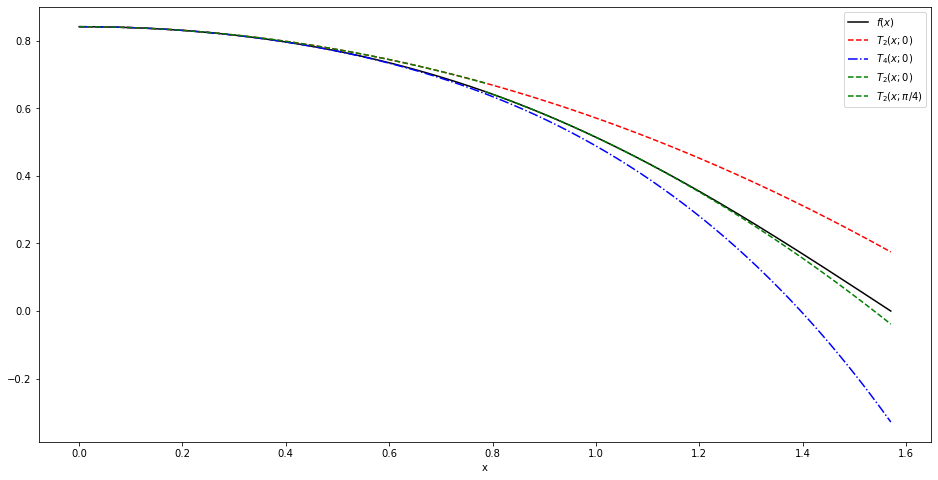

In [66]:
xvals = np.linspace(0.,np.pi/2.,int(1e3))
xvalshlf = np.linspace(0.,np.pi/4.,int(1e3))
xvalsothlf = np.linspace(np.pi/4.,np.pi/2.,int(1e3))
plt.plot(xvals,f0(xvals),color='k',ls='-',label="$f(x)$")
plt.plot(xvals,T2(xvals,0.),color='r',ls='--',label="$T_{2}(x;0)$")
plt.plot(xvals,T4(xvals,0.),color='b',ls='-.',label="$T_{4}(x;0)$")
plt.plot(xvalshlf,T2(xvalshlf,0.),color='g',ls='--',label="$T_{2}(x;0)$")
plt.plot(xvalsothlf,T2(xvalsothlf,np.pi/4.),color='g',ls='--',label=r"$T_{2}(x;\pi/4)$")
plt.legend()
plt.xlabel('x')
fig=plt.gcf() # get current figure
fig.set_size_inches(16,8) # optional size

So we see several interesting features here.  While $T_{4}(x;0)$ is a better approximation for longer than $T_{2}(x;0)$, it turns out $\pi/2$ is too far for either to ensure that we get good approximations.  

**Problem 2**: For the integral 

$$
I = \int_{0}^{\pi/2}\sin(\cos(x)) dx
$$

we will now generate approximations using midpoints of intervals.  

<ol>
    <li> (3pts) Using the second order Taylor series approximation $T_{2}(x;\pi/4)$, find an approximation to $I$.
    <li> (3pts) Using the third order Taylor series approximation $T_{3}(x;\pi/4)$, find an approximation to $I$.
    <li> (3pts) Separating the interval of integration in half, use $T_{2}(x;\pi/8)$ and $T_{2}(x;3\pi/8)$ to approximate $I$.
</ol>

Show all relevant computations and results as well as the code you use to compute everything.  Finally, comment on and compare your results (4pts).  Which was the most accurate Taylor series approximation and why?  Support your argument with plots of the various approximations (4pts) (see the notes for help).  

_Answer to Problem 2.1_

In [55]:
Ivaprx5 = IT2(np.pi/4., 0., np.pi/2.)
print("The second order approximation around the midpoint of the interval gives I_a=%1.15f" %Ivaprx5)
print("The absolute error in this approximation is E=%1.2e" %np.abs(Ival[0]-Ivaprx5))

The second order approximation around the midpoint of the interval gives I_a=0.881178656580230
The absolute error in this approximation is E=1.21e-02


_Answer to Problem 2.2_

In [56]:
Ivaprx6 = IT3(np.pi/4., 0., np.pi/2.)
print("The third order approximation around the midpoint of the interval gives I_a=%1.15f" %Ivaprx6)
print("The absolute error in this approximation is E=%1.2e" %np.abs(Ival[0]-Ivaprx6))

The third order approximation around the midpoint of the interval gives I_a=0.881178656580230
The absolute error in this approximation is E=1.21e-02


_Answer to Problem 2.3_

In [57]:
Ivaprx7 = IT2(np.pi/8., 0., np.pi/4.)
Ivaprx8 = IT2(3.*np.pi/8., np.pi/4., np.pi/2.)
Ivaprxtot2 = Ivaprx7 + Ivaprx8
print("The split interval approximation is I_a=%1.15f" %Ivaprxtot2)
print("The absolute error in this approximation is E=%1.2e" %np.abs(Ival[0]-Ivaprxtot2))

The split interval approximation is I_a=0.892781871122244
The absolute error in this approximation is E=4.62e-04


_Discussion and Plots for Problem 2_

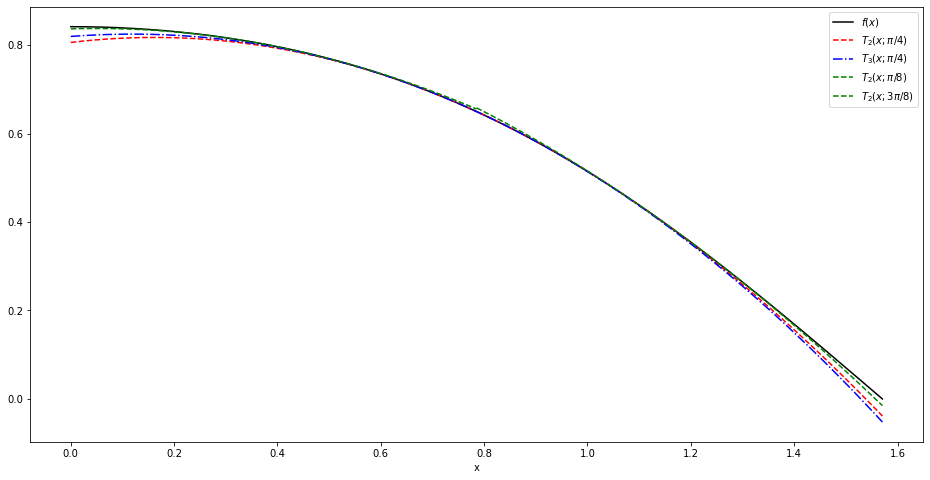

In [67]:
plt.plot(xvals,f0(xvals),color='k',ls='-',label="$f(x)$")
plt.plot(xvals,T2(xvals,np.pi/4.),color='r',ls='--',label=r"$T_{2}(x;\pi/4)$")
plt.plot(xvals,T3(xvals,np.pi/4.),color='b',ls='-.',label=r"$T_{3}(x;\pi/4)$")
plt.plot(xvalshlf,T2(xvalshlf,np.pi/8.),color='g',ls='--',label=r"$T_{2}(x;\pi/8)$")
plt.plot(xvalsothlf,T2(xvalsothlf,3.*np.pi/8.),color='g',ls='--',label=r"$T_{2}(x;3\pi/8)$")
plt.legend()
plt.xlabel('x')
fig=plt.gcf() # get current figure
fig.set_size_inches(16,8) # optional size

So by recentering our approximations, we get at least a power of ten improvement in our approximations.  By dividing our interval down in half, we get two powers of ten improvement in our approximation.  Thus overall, we see that using well placed, relatively low order approximations over reasonably small intervals is best in contrast to using higher-order approximations over longer intervals.  But again, placement seems to be more important than anything.  